# Notebook for Visualization of different characteristics


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.data.sampling_strategy import ConstantAmplitudesSamplingStrategy, SamplingStrategy
from src.data.sampler import MeanSamplerConstant, AmplitudeSamplerConstant, NoiseSamplerNormal
from src.data.make_dataset import make_mixed_dataset
from src.visualization.visualize import InputOutputVisualization
from src.visualization.utils import TURQUOIS, FAU_GREY, FAU_BLUE

class MockSamplingStrategy(SamplingStrategy):
    def __init__(self, sequence_length, sigma):
        super().__init__(
            mean_sampler=MeanSamplerConstant(mean_value=72),
            amplitude_sampler=AmplitudeSamplerConstant([60, 10, 40]),
            noise_sampler=NoiseSamplerNormal(sigma, sequence_length),
        )

    def __str__(self):
        return f"Constant amplitude - Constant mean sampler, noise is i.i.d"

    def get_descriptor(self) -> str:
        return "constant amplitudes"

2021-11-08 13:08:09 Mischa-PC numexpr.utils[4896] INFO NumExpr defaulting to 8 threads.


# Visualize different delay lengths

2021-11-08 13:17:46 Mischa-PC src.data[4896] WARNING Sample size 10 cannot be equally distributed into 4 different datasets
2021-11-08 13:17:46 Mischa-PC src.visualization[4896] INFO using latex font


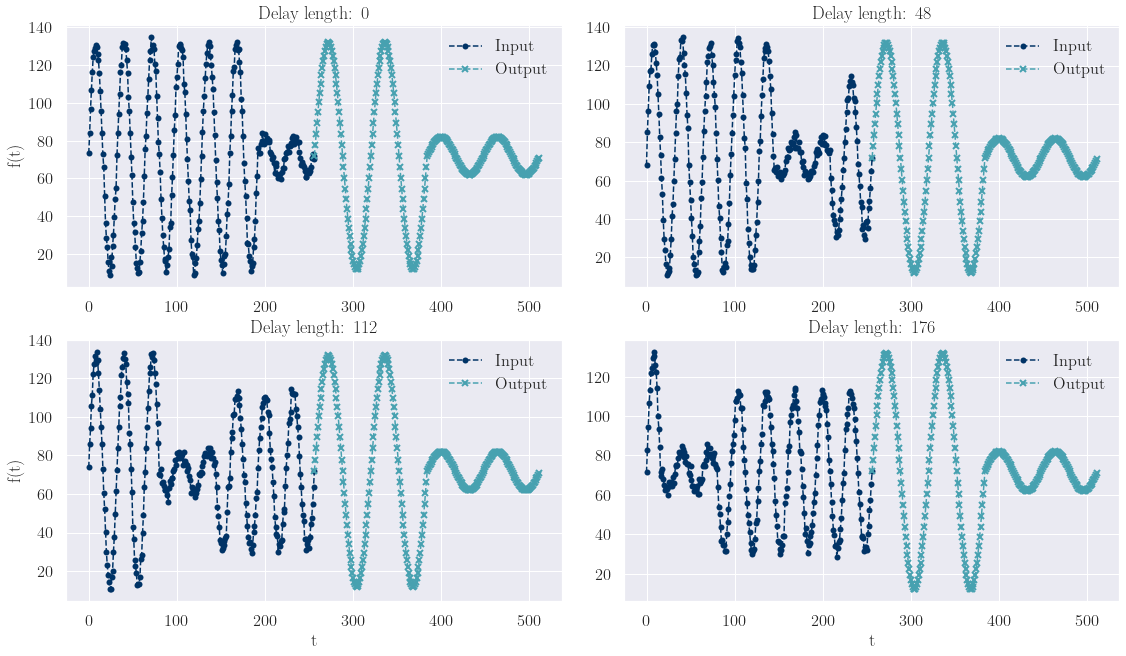

In [19]:
sample_size = 10
sequence_lengths="512"
frequencies=[1/32,]
delays=[0, 48, 112, 176]
sampling_strategy_class = ConstantAmplitudesSamplingStrategy
dataset_delay = make_mixed_dataset(sample_size=sample_size,
                             sampling_strategy_class=MockSamplingStrategy,
                             frequencies=frequencies,
                             delays=delays,
                             sigmas=[2],
                             sample_sequence_lengths=[512,]
                             )

samples_delay = []
for i, d in enumerate(delays):
    for j in range(len(dataset_delay)):
        if dataset_delay.get_delay(j) == d:
            x_delay, y_delay, _ = dataset_delay[j]
            ts_delay = np.concatenate((x_delay, y_delay), axis=0).reshape(-1)
            samples_delay.append(ts_delay)
            break

use_latex_font = True
viz = InputOutputVisualization(use_latex_font=use_latex_font, font_scale=1.5)
viz.subplots(nrows=2, ncols=2, figsize=(16, 9))
plt.tight_layout()
viz.plot(samples_delay, pred_starts=[256,]*4)
viz.add_subplot_titles(titles=[f"Delay length: {d}" for d in delays])
[viz.get_ax(i).legend() for i in range(4)]
# label x and y axis but only for the outermost graphs
viz.get_ax(2).set_xlabel("t")
viz.get_ax(3).set_xlabel("t")
viz.get_ax(0).set_ylabel("f(t)")
viz.get_ax(2).set_ylabel("f(t)")
viz.plt.subplots_adjust(left=0.06)
viz.save(filename="figures/four_different_delays")
viz.plt.show()


# Visualize different frequencies

2021-11-08 13:21:52 Mischa-PC src.data[4896] WARNING Sample size 10 cannot be equally distributed into 4 different datasets
2021-11-08 13:21:52 Mischa-PC src.visualization[4896] INFO using latex font


['Frequency: $\\frac{1}{16}$', 'Frequency: $\\frac{1}{32}$', 'Frequency: $\\frac{1}{64}$', 'Frequency: $\\frac{1}{128}$']


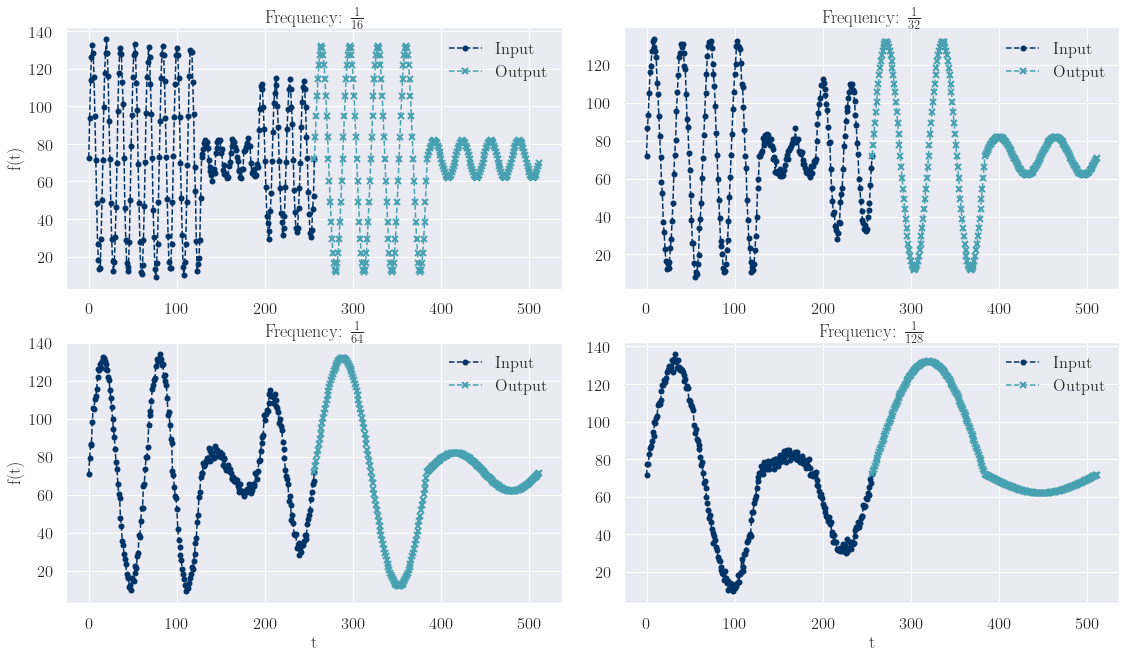

In [24]:
sample_size = 10
sequence_lengths="512"
frequencies=[1/16, 1/32, 1/64, 1/128]
delays=[64,]
sampling_strategy_class = ConstantAmplitudesSamplingStrategy
dataset_freq = make_mixed_dataset(sample_size=sample_size,
                             sampling_strategy_class=MockSamplingStrategy,
                             frequencies=frequencies,
                             delays=delays,
                             sigmas=[2],
                             sample_sequence_lengths=[512,]
                             )

samples_freq = []
for i, f in enumerate(frequencies):
    for j in range(len(dataset_freq)):
        if dataset_freq.get_frequency(j) == f:
            x_delay, y_delay, _ = dataset_freq[j]
            ts_delay = np.concatenate((x_delay, y_delay), axis=0).reshape(-1)
            samples_freq.append(ts_delay)
            break

viz = InputOutputVisualization(use_latex_font=use_latex_font, font_scale=1.5)
viz.subplots(nrows=2, ncols=2, figsize=(16, 9))
plt.tight_layout()
viz.plot(samples_freq, pred_starts=[256,]*4)
titles = [r"Frequency: $\frac{1}{" + repr(int(1/f)) + r"}$" for f in frequencies]
print(titles)
viz.add_subplot_titles(titles=titles)
[viz.get_ax(i).legend() for i in range(4)]
# label x and y axis but only for the outermost graphs
viz.get_ax(2).set_xlabel("t")
viz.get_ax(3).set_xlabel("t")
viz.get_ax(0).set_ylabel("f(t)")
viz.get_ax(2).set_ylabel("f(t)")
viz.plt.subplots_adjust(left=0.06)
viz.save("figures/four_different_frequencies")
viz.plt.show()
